In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/spaceship-titanic/sample_submission.csv
/kaggle/input/spaceship-titanic/train.csv
/kaggle/input/spaceship-titanic/test.csv


>  Load the datasets from the input section (both train and test)

In [2]:
titanic_train = pd.read_csv('/kaggle/input/spaceship-titanic/train.csv')
titanic_test = pd.read_csv('/kaggle/input/spaceship-titanic/test.csv')

> Display fundamental information about the training set

In [3]:
titanic_train.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [4]:
titanic_train.shape

(8693, 14)

In [5]:
titanic_train.columns

Index(['PassengerId', 'HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'Age',
       'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck',
       'Name', 'Transported'],
      dtype='object')

In [6]:
titanic_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [7]:
titanic_train.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


> Show the number of NA data in the set

In [8]:
train_data_NA = titanic_train.isna().sum()

train_data_NA

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

> Store the numerical column names 

In [9]:
numerical_col = [cname for cname in titanic_train.columns if titanic_train[cname].dtype in ['int64', 'float64']]


for col in numerical_col:
    print(titanic_train[col].value_counts())
    for print_newline in range(5):
        print()
    

24.0    324
18.0    320
21.0    311
19.0    293
23.0    292
       ... 
72.0      4
78.0      3
79.0      3
76.0      2
77.0      2
Name: Age, Length: 80, dtype: int64





0.0       5577
1.0        117
2.0         79
3.0         61
4.0         47
          ... 
1612.0       1
2598.0       1
632.0        1
378.0        1
745.0        1
Name: RoomService, Length: 1273, dtype: int64





0.0       5456
1.0        116
2.0         75
3.0         53
4.0         53
          ... 
3846.0       1
5193.0       1
312.0        1
827.0        1
4688.0       1
Name: FoodCourt, Length: 1507, dtype: int64





0.0       5587
1.0        153
2.0         80
3.0         59
4.0         45
          ... 
3627.0       1
2074.0       1
871.0        1
742.0        1
1872.0       1
Name: ShoppingMall, Length: 1115, dtype: int64





0.0       5324
1.0        146
2.0        105
5.0         53
3.0         53
          ... 
273.0        1
2581.0       1
2948.0       1
3778.0       1
1643.0       1
Name: Spa, Leng

> Store the categorical column names 

In [10]:
categorical_col = [cname for cname in titanic_train.columns if titanic_train[cname].dtype in ['object']]


for col in categorical_col:
    print(titanic_train[col].value_counts())
    for print_newline in range(5):
        print()

0001_01    1
6136_01    1
6141_01    1
6139_06    1
6139_05    1
          ..
3126_01    1
3124_03    1
3124_02    1
3124_01    1
9280_02    1
Name: PassengerId, Length: 8693, dtype: int64





Earth     4602
Europa    2131
Mars      1759
Name: HomePlanet, dtype: int64





False    5439
True     3037
Name: CryoSleep, dtype: int64





G/734/S     8
G/109/P     7
B/201/P     7
G/1368/P    7
G/981/S     7
           ..
G/556/P     1
E/231/S     1
G/545/S     1
G/543/S     1
F/947/P     1
Name: Cabin, Length: 6560, dtype: int64





TRAPPIST-1e      5915
55 Cancri e      1800
PSO J318.5-22     796
Name: Destination, dtype: int64





False    8291
True      199
Name: VIP, dtype: int64





Gollux Reedall        2
Elaney Webstephrey    2
Grake Porki           2
Sus Coolez            2
Apix Wala             2
                     ..
Jamela Griffy         1
Hardy Griffy          1
Salley Mckinn         1
Mall Frasp            1
Propsh Hontichre      1
Name: Name, Length: 8473, dtype: int64


> Drop the unnecessary features in the set

In [11]:
titanic_train = titanic_train.drop(['Name', 'PassengerId'], axis = 1)

In [12]:
categorical_col.remove('Name')
categorical_col.remove('PassengerId')

>Show the heatmap for missing data

<AxesSubplot:>

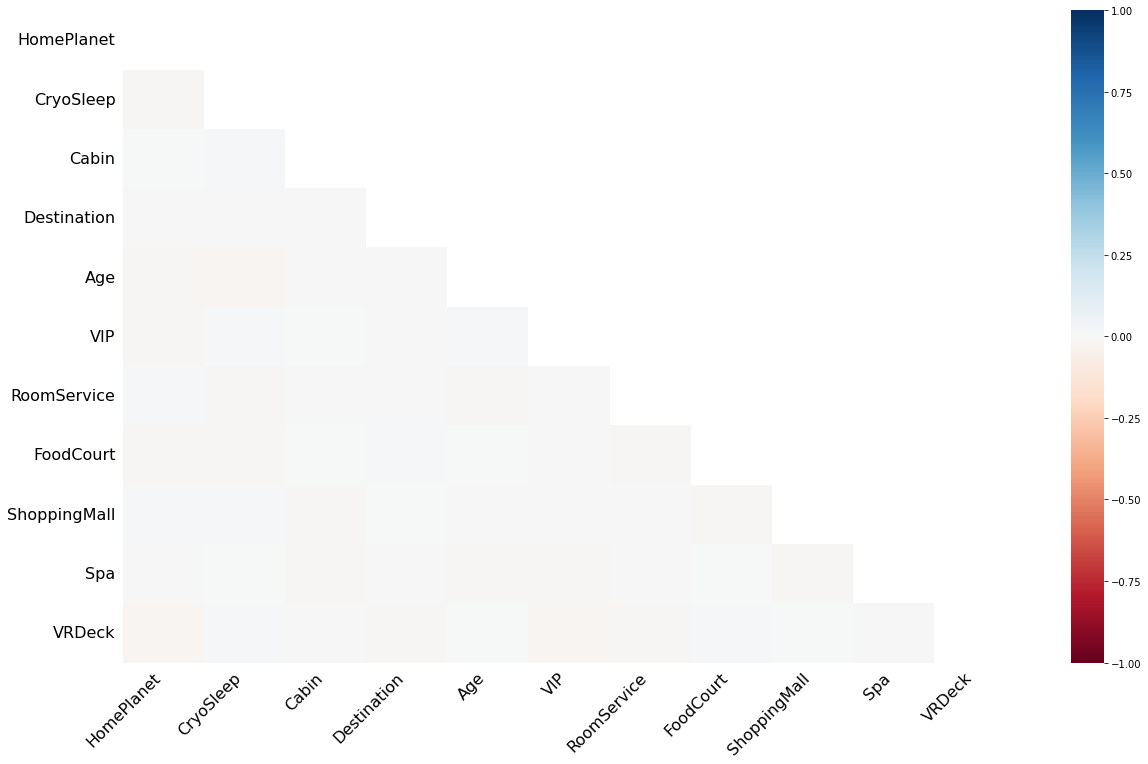

In [13]:
import missingno as msno

msno.heatmap(titanic_train)

>Skewness is a measure of symmetry, or more precisely, the lack of symmetry. 

In [14]:
titanic_train[numerical_col].skew()

Age              0.419097
RoomService      6.333014
FoodCourt        7.102228
ShoppingMall    12.627562
Spa              7.636020
VRDeck           7.819732
dtype: float64

>Kurtosis is a measure of whether the data are heavy-tailed or light-tailed relative to a normal distribution.

In [15]:
titanic_train[numerical_col].kurt()

Age               0.101933
RoomService      65.273802
FoodCourt        73.307230
ShoppingMall    328.870913
Spa              81.202110
VRDeck           86.011186
dtype: float64

# Data Representations 

Text(0, 0.5, 'Number of passengers')

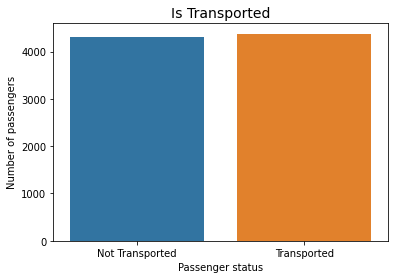

In [16]:
sns.countplot(x = 'Transported', data = titanic_train)

plt.xticks( np.arange(2), ['Not Transported', 'Transported'] )
plt.title('Is Transported',fontsize= 14)
plt.xlabel('Passenger status')
plt.ylabel('Number of passengers')

In [17]:
titanic_train['Transported'].value_counts(normalize = True)

True     0.503624
False    0.496376
Name: Transported, dtype: float64

> Divide the set into 2 according to their 'Transported' situation

In [18]:
transported_class = titanic_train[(titanic_train["Transported"] == True)]
not_transported_class = titanic_train[(titanic_train["Transported"] == False)]

In [19]:
transported_class.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,4288.000000,4295.000000,4279.000000,4264.000000,4287.000000,4280.000000
mean,27.748834,63.098021,532.691984,179.829972,61.675531,69.148131
std,15.151705,274.812497,1931.306995,722.026714,262.682871,291.658171
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,26.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,78.000000,3992.000000,29813.000000,23492.000000,4103.000000,5063.000000


In [20]:
not_transported_class.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,4226.000000,4217.000000,4231.000000,4221.000000,4223.000000,4225.000000
mean,29.922858,389.266066,382.615930,167.566217,564.382666,543.629822
std,13.699262,875.638123,1200.115601,456.528126,1551.356047,1563.088368
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,21.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,1.000000,0.000000,0.000000,4.000000,1.000000
75%,38.000000,473.000000,179.000000,95.000000,453.500000,388.000000
max,79.000000,14327.000000,16856.000000,10705.000000,22408.000000,24133.000000


<Figure size 1080x216 with 0 Axes>

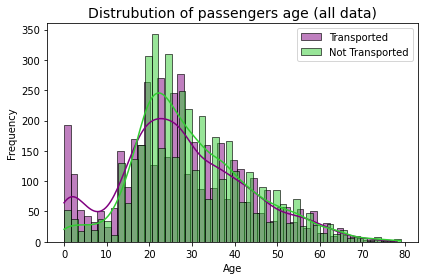

In [21]:
plt.figure(figsize=(15, 3))
fig, ax = plt.subplots()

# plot a univariate distribution of Age observations 
sns.histplot(transported_class, x = 'Age', kde=True, bins = 50 , label='Transported', color = 'purple')
sns.histplot(not_transported_class, x = 'Age', kde=True, bins = 50 , label='Not Transported', color = 'limegreen')

# set titles and labels
ax.legend()
plt.title('Distrubution of passengers age (all data)',fontsize= 14)
plt.xlabel('Age')
plt.ylabel('Frequency')
# clean layout
plt.tight_layout()
plt.show()

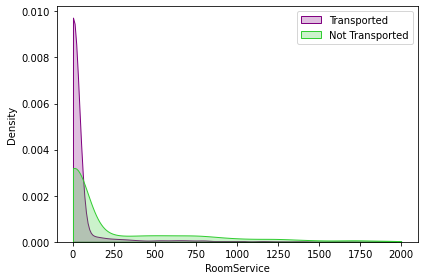

In [22]:
fig, ax = plt.subplots()
sns.kdeplot(x='RoomService', data=transported_class[(transported_class['RoomService'] <= 2000)], color='purple', label='Transported', fill=True, cut=0)
sns.kdeplot(x='RoomService', data=not_transported_class[(not_transported_class['RoomService'] <= 2000)], color='limegreen', label='Not Transported',fill=True, cut=0)

ax.legend()
plt.tight_layout()
plt.show()

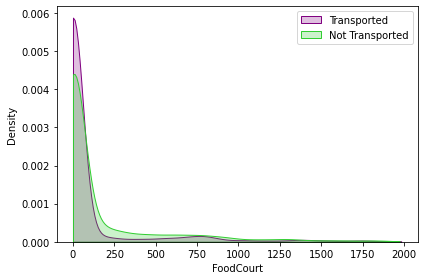

In [23]:
fig, ax = plt.subplots()
sns.kdeplot(x='FoodCourt', data=transported_class[(transported_class['FoodCourt'] <= 2000)], color='purple', label='Transported', fill=True, cut=0)
sns.kdeplot(x='FoodCourt', data=not_transported_class[(not_transported_class['FoodCourt'] <= 2000)], color='limegreen', label='Not Transported', fill=True, cut=0)

ax.legend()
plt.tight_layout()
plt.show()

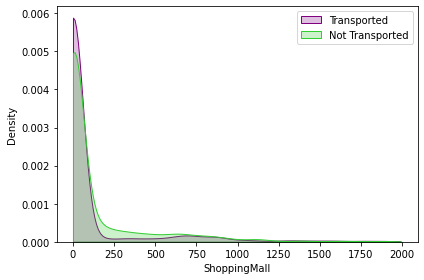

In [24]:
fig, ax = plt.subplots()
sns.kdeplot(x='ShoppingMall', data=transported_class[(transported_class['ShoppingMall'] <= 2000)], color='purple', label='Transported', fill=True, cut=0)
sns.kdeplot(x='ShoppingMall', data=not_transported_class[(not_transported_class['ShoppingMall'] <= 2000)], color='limegreen', label='Not Transported', fill=True, cut=0)

ax.legend()
plt.tight_layout()
plt.show()

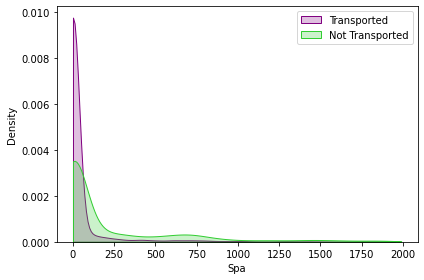

In [25]:
fig, ax = plt.subplots()
sns.kdeplot(x='Spa', data=transported_class[(transported_class['Spa'] <= 2000)], color='purple', label='Transported', fill=True, cut=0)
sns.kdeplot(x='Spa', data=not_transported_class[(not_transported_class['Spa'] <= 2000)], color='limegreen', label='Not Transported', fill=True, cut=0)

ax.legend()
plt.tight_layout()
plt.show()

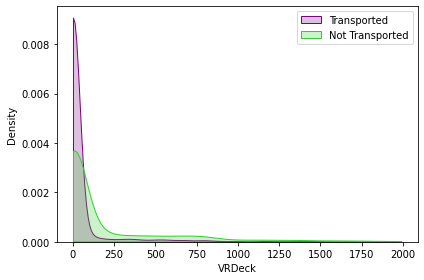

In [26]:
fig, ax = plt.subplots()
sns.kdeplot(x='VRDeck', data=transported_class[(transported_class['VRDeck'] <= 2000)], color='purple', label='Transported', fill=True, cut=0)
sns.kdeplot(x='VRDeck', data=not_transported_class[(not_transported_class['VRDeck'] <= 2000)], color='limegreen', label='Not Transported', fill=True, cut=0)

ax.legend()
plt.tight_layout()
plt.show()

<AxesSubplot:xlabel='HomePlanet', ylabel='Transported'>

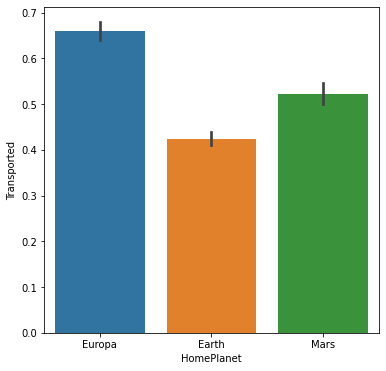

In [27]:
f, ax = plt.subplots(figsize=(6,6))

sns.barplot(x='HomePlanet', y= 'Transported', data=titanic_train)

<AxesSubplot:xlabel='CryoSleep', ylabel='Transported'>

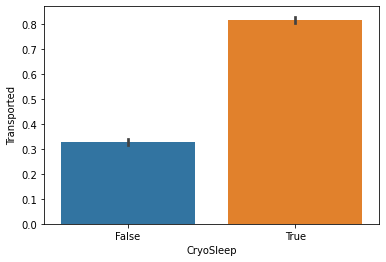

In [28]:
sns.barplot(x='CryoSleep', y= 'Transported', data=titanic_train)

<AxesSubplot:xlabel='Destination', ylabel='Transported'>

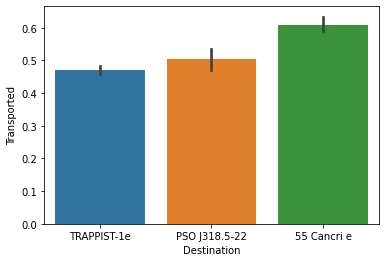

In [29]:
sns.barplot(x='Destination', y= 'Transported', data=titanic_train)

<AxesSubplot:xlabel='VIP', ylabel='Transported'>

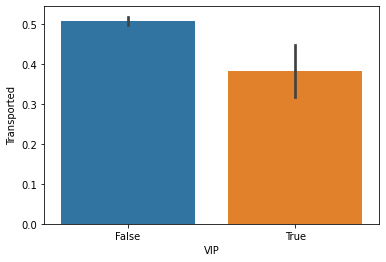

In [30]:
sns.barplot(x='VIP', y= 'Transported', data=titanic_train)

> Create a new feature by using the current feature 'Cabin'

In [31]:
new = titanic_train['Cabin'].str.split("/", n = 2 , expand = True)
titanic_train["Deck"] = new[0]
titanic_train["Side"] = new[2]
titanic_train.drop(columns = ["Cabin"], inplace = True)
titanic_train.head()

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Deck,Side
0,Europa,False,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,False,B,P
1,Earth,False,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,True,F,S
2,Europa,False,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False,A,S
3,Europa,False,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False,A,S
4,Earth,False,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,True,F,S


In [32]:
titanic_train['Cabin'] = titanic_train["Deck"] + titanic_train["Side"]
titanic_train.drop(columns = ["Deck"], inplace = True)
titanic_train.drop(columns = ["Side"], inplace = True)
titanic_train.head()

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Cabin
0,Europa,False,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,False,BP
1,Earth,False,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,True,FS
2,Europa,False,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False,AS
3,Europa,False,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False,AS
4,Earth,False,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,True,FS


In [33]:
titanic_train['Cabin'].value_counts()

FP    1438
FS    1356
GS    1283
GP    1276
ES     447
EP     429
BS     426
CS     406
BP     353
CP     341
DP     248
DS     230
AS     139
AP     117
TP       4
TS       1
Name: Cabin, dtype: int64

<AxesSubplot:xlabel='Cabin', ylabel='Transported'>

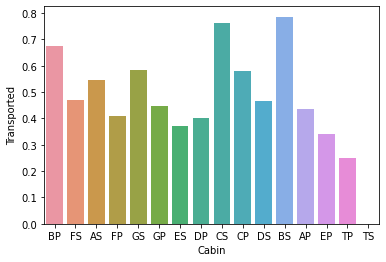

In [34]:
sns.barplot(x='Cabin', y= 'Transported', data=titanic_train, ci=0)

In [35]:
titanic_train.head()

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Cabin
0,Europa,False,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,False,BP
1,Earth,False,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,True,FS
2,Europa,False,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False,AS
3,Europa,False,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False,AS
4,Earth,False,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,True,FS


>Create pair plots to see the relation

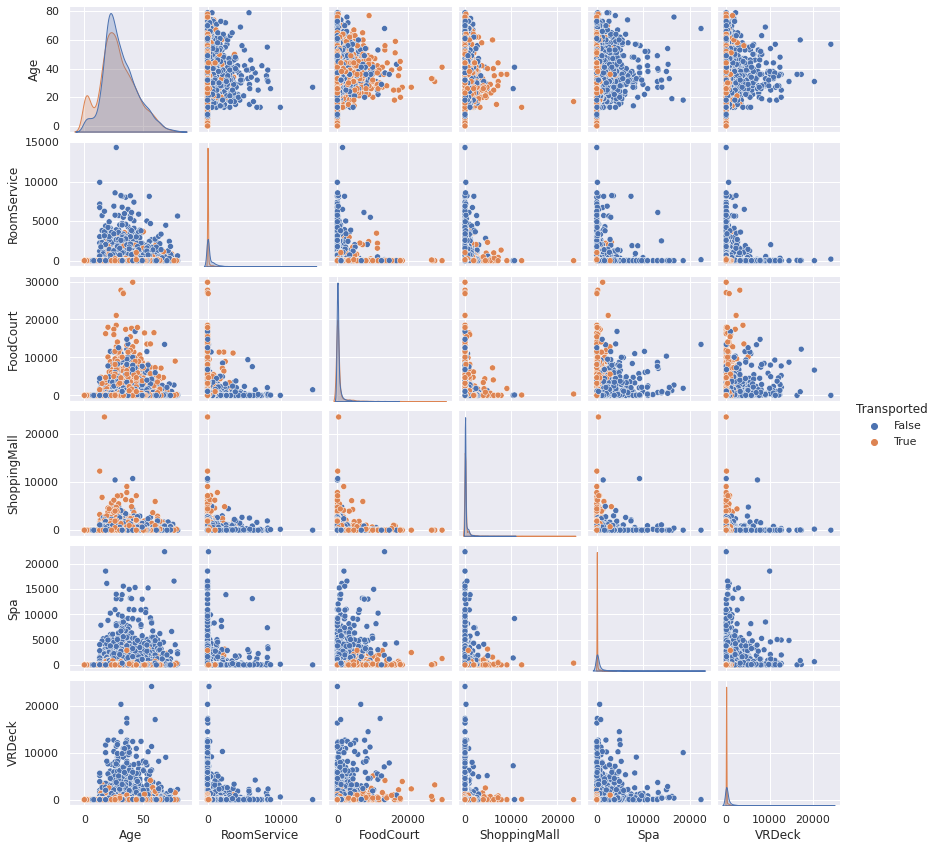

In [36]:
sns.set()
sns.pairplot(titanic_train[numerical_col + ['Transported']],height = 2 ,kind ='scatter',diag_kind='kde', hue="Transported")
plt.show()

<AxesSubplot:xlabel='Cabin', ylabel='Age'>

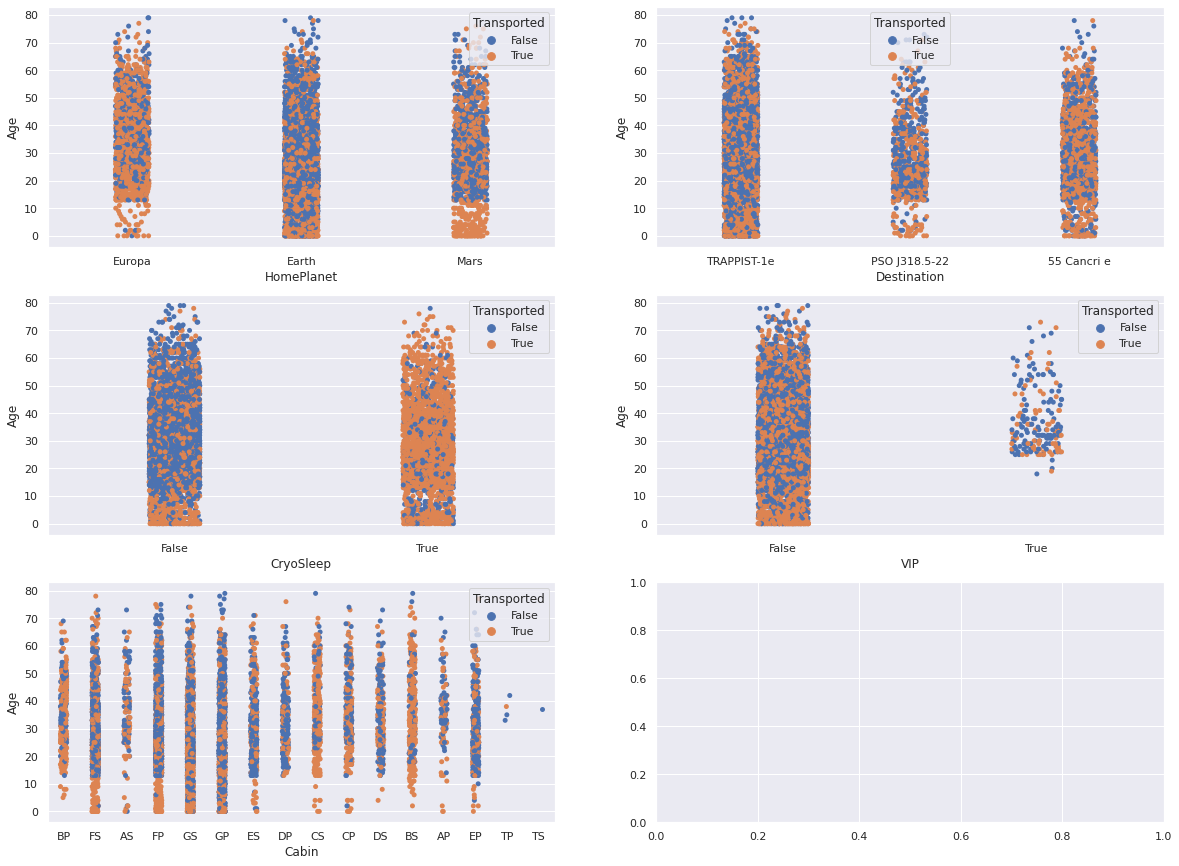

In [37]:
fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6)) = plt.subplots(nrows=3, ncols=2, figsize=(20,15))
sns.stripplot(data=titanic_train, x='HomePlanet', y='Age', hue="Transported", ax=ax1)
sns.stripplot(data=titanic_train, x='Destination', y='Age', hue="Transported", ax=ax2)
sns.stripplot(data=titanic_train, x='CryoSleep', y='Age', hue="Transported", ax=ax3)
sns.stripplot(data=titanic_train, x='VIP', y='Age', hue="Transported", ax=ax4)
sns.stripplot(data=titanic_train, x='Cabin', y='Age', hue="Transported", ax=ax5)


<AxesSubplot:xlabel='Cabin', ylabel='RoomService'>

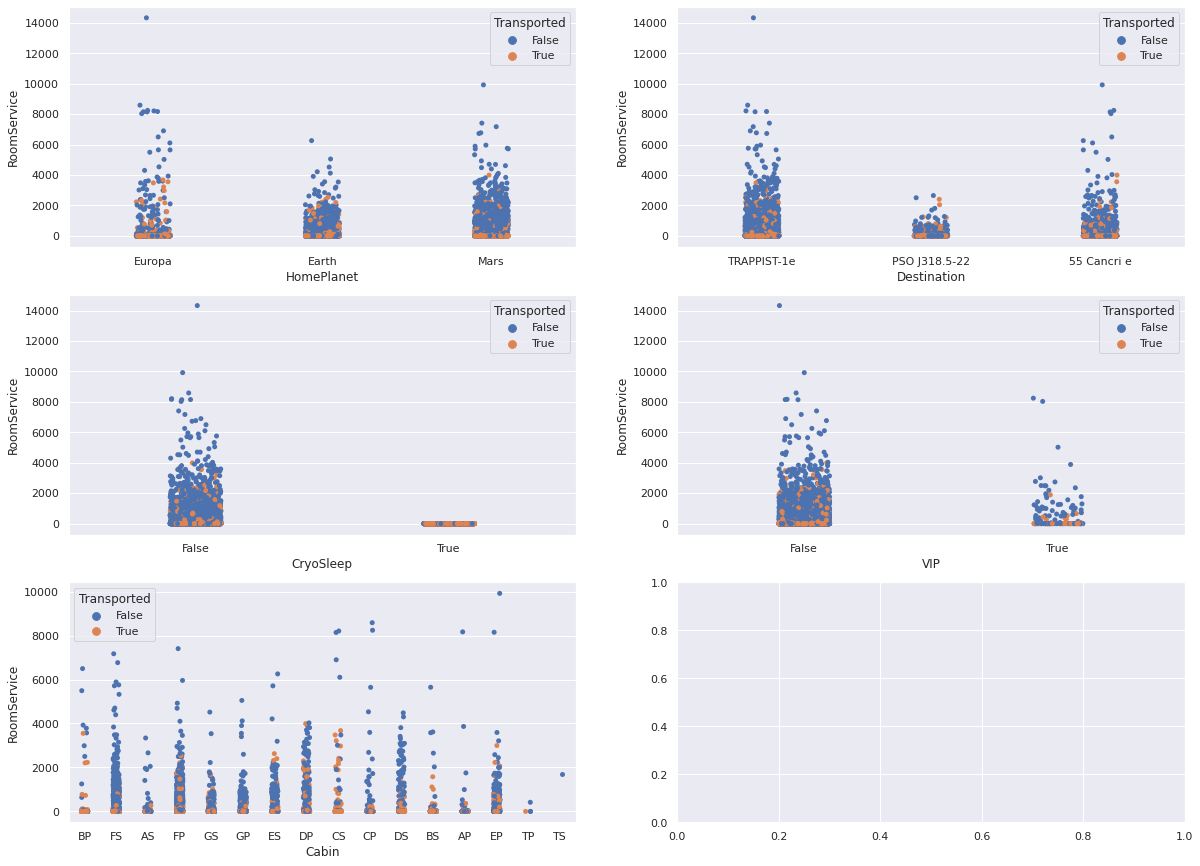

In [38]:
fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6)) = plt.subplots(nrows=3, ncols=2, figsize=(20,15))
sns.stripplot(data=titanic_train, x='HomePlanet', y='RoomService', hue="Transported", ax=ax1)
sns.stripplot(data=titanic_train, x='Destination', y='RoomService', hue="Transported", ax=ax2)
sns.stripplot(data=titanic_train, x='CryoSleep', y='RoomService', hue="Transported", ax=ax3)
sns.stripplot(data=titanic_train, x='VIP', y='RoomService', hue="Transported", ax=ax4)
sns.stripplot(data=titanic_train, x='Cabin', y='RoomService', hue="Transported", ax=ax5)

<AxesSubplot:xlabel='Cabin', ylabel='FoodCourt'>

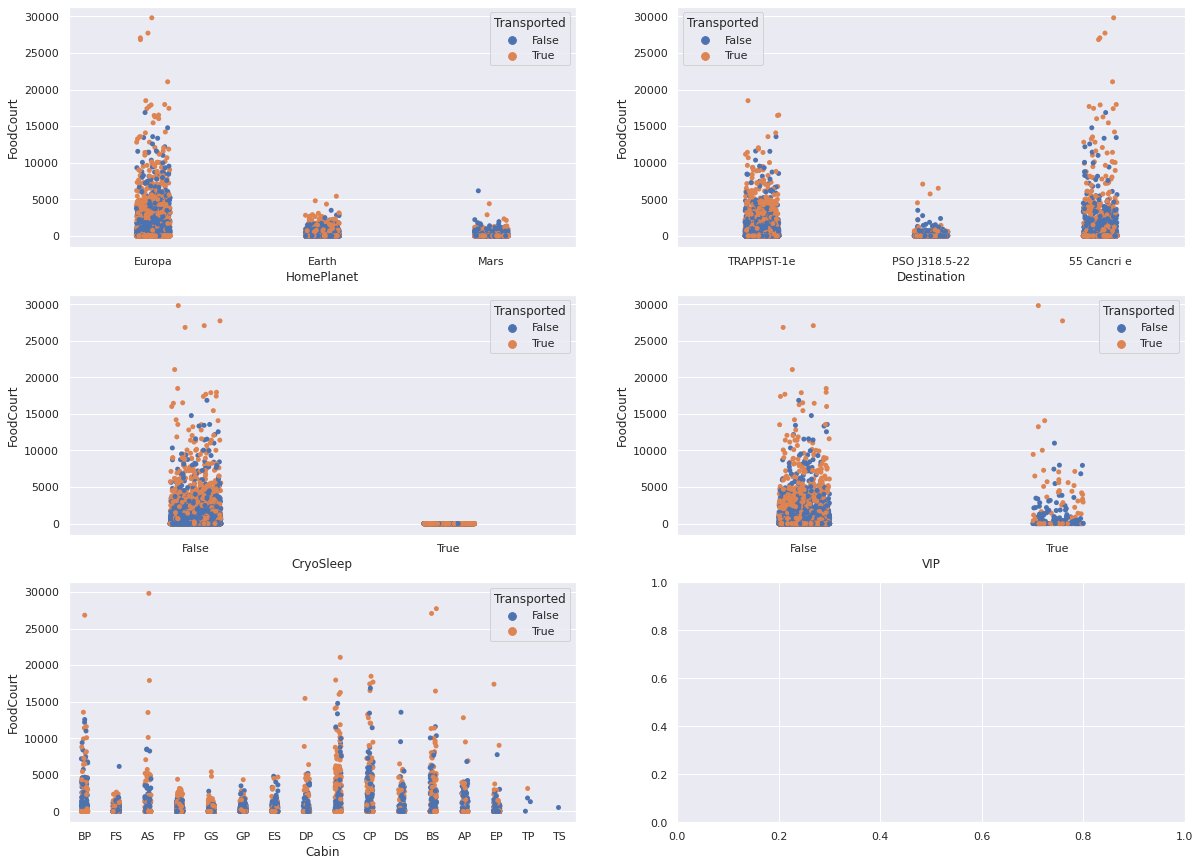

In [39]:
fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6)) = plt.subplots(nrows=3, ncols=2, figsize=(20,15))
sns.stripplot(data=titanic_train, x='HomePlanet', y='FoodCourt', hue="Transported", ax=ax1)
sns.stripplot(data=titanic_train, x='Destination', y='FoodCourt', hue="Transported", ax=ax2)
sns.stripplot(data=titanic_train, x='CryoSleep', y='FoodCourt', hue="Transported", ax=ax3)
sns.stripplot(data=titanic_train, x='VIP', y='FoodCourt', hue="Transported", ax=ax4)
sns.stripplot(data=titanic_train, x='Cabin', y='FoodCourt', hue="Transported", ax=ax5)

<AxesSubplot:xlabel='Cabin', ylabel='ShoppingMall'>

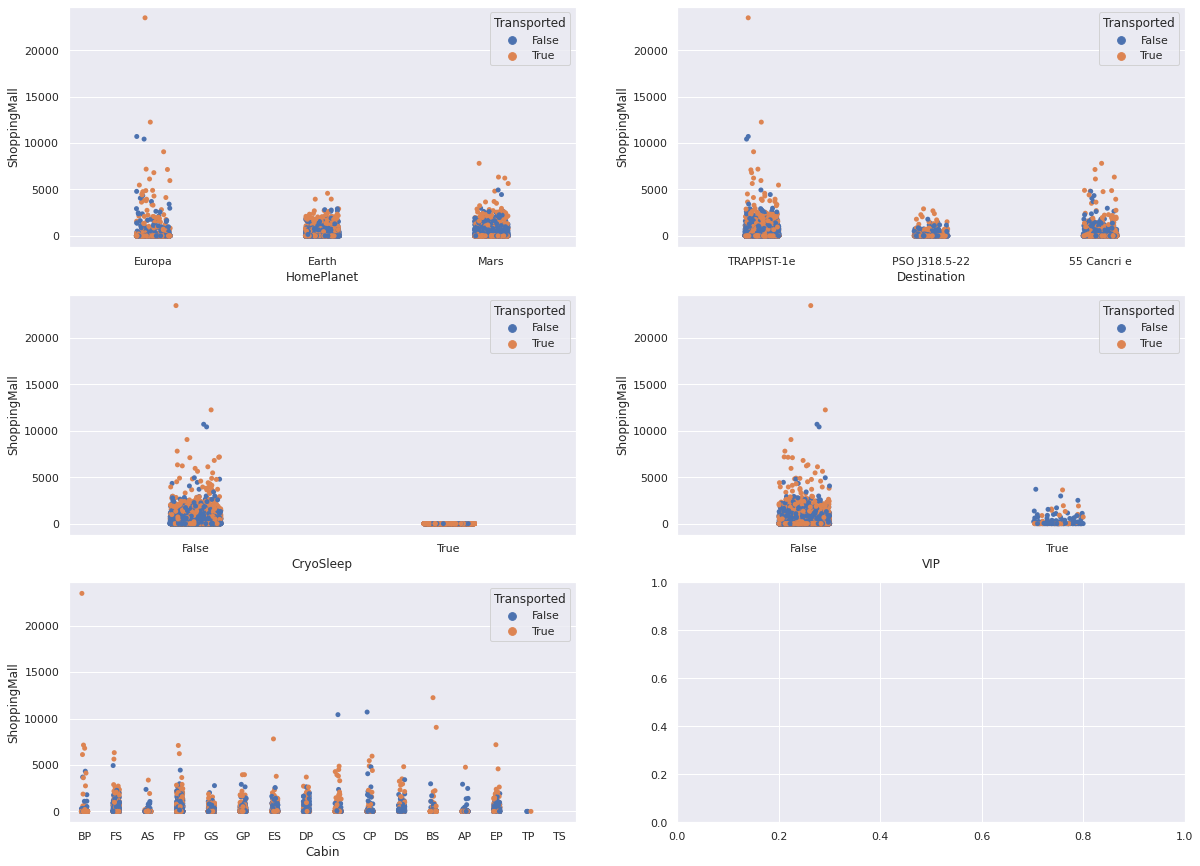

In [40]:
fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6)) = plt.subplots(nrows=3, ncols=2, figsize=(20,15))
sns.stripplot(data=titanic_train, x='HomePlanet', y='ShoppingMall', hue="Transported", ax=ax1)
sns.stripplot(data=titanic_train, x='Destination', y='ShoppingMall', hue="Transported", ax=ax2)
sns.stripplot(data=titanic_train, x='CryoSleep', y='ShoppingMall', hue="Transported", ax=ax3)
sns.stripplot(data=titanic_train, x='VIP', y='ShoppingMall', hue="Transported", ax=ax4)
sns.stripplot(data=titanic_train, x='Cabin', y='ShoppingMall', hue="Transported", ax=ax5)

<AxesSubplot:xlabel='Cabin', ylabel='Spa'>

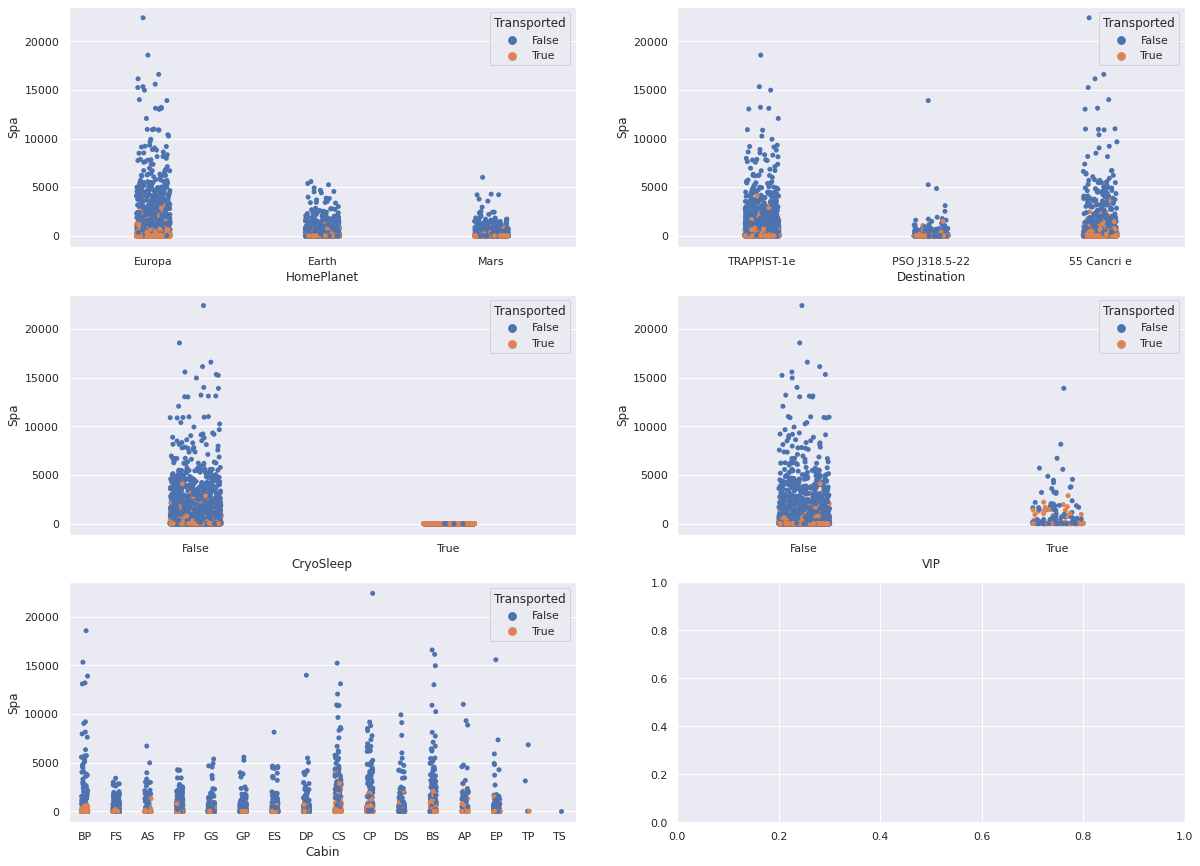

In [41]:
fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6)) = plt.subplots(nrows=3, ncols=2, figsize=(20,15))
sns.stripplot(data=titanic_train, x='HomePlanet', y='Spa', hue="Transported", ax=ax1)
sns.stripplot(data=titanic_train, x='Destination', y='Spa', hue="Transported", ax=ax2)
sns.stripplot(data=titanic_train, x='CryoSleep', y='Spa', hue="Transported", ax=ax3)
sns.stripplot(data=titanic_train, x='VIP', y='Spa', hue="Transported", ax=ax4)
sns.stripplot(data=titanic_train, x='Cabin', y='Spa', hue="Transported", ax=ax5)

<AxesSubplot:xlabel='Cabin', ylabel='VRDeck'>

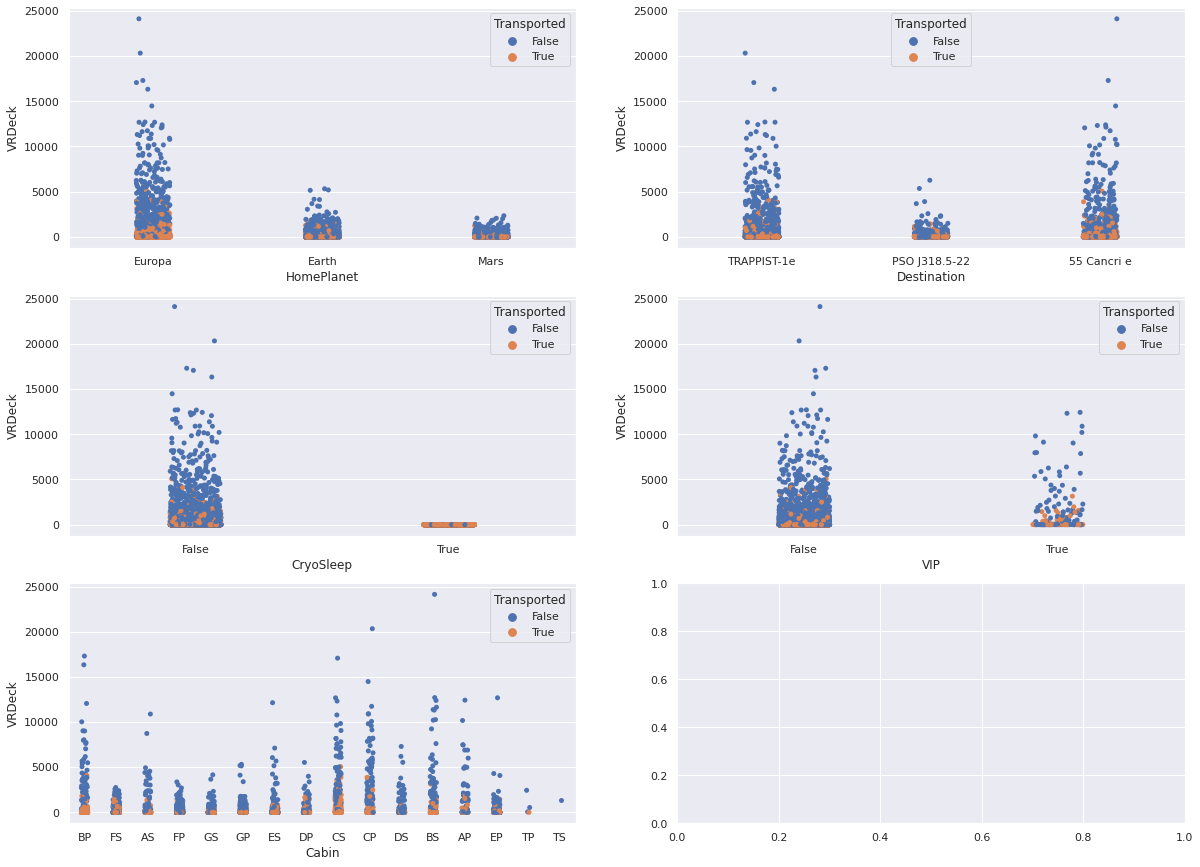

In [42]:
fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6)) = plt.subplots(nrows=3, ncols=2, figsize=(20,15))
sns.stripplot(data=titanic_train, x='HomePlanet', y='VRDeck', hue="Transported", ax=ax1)
sns.stripplot(data=titanic_train, x='Destination', y='VRDeck', hue="Transported", ax=ax2)
sns.stripplot(data=titanic_train, x='CryoSleep', y='VRDeck', hue="Transported", ax=ax3)
sns.stripplot(data=titanic_train, x='VIP', y='VRDeck', hue="Transported", ax=ax4)
sns.stripplot(data=titanic_train, x='Cabin', y='VRDeck', hue="Transported", ax=ax5)

In [43]:
correlation = titanic_train[numerical_col+['Transported']].corr()
print(correlation['Transported'].sort_values(ascending = False),'\n')

Transported     1.000000
FoodCourt       0.046566
ShoppingMall    0.010141
Age            -0.075026
VRDeck         -0.207075
Spa            -0.221131
RoomService    -0.244611
Name: Transported, dtype: float64 



# Imputation of Missing Values

> Impute the missing age data 

In [44]:
titanic_train['Age'] = titanic_train['Age'].fillna(titanic_train['Age'].mean())
train_data_NA = titanic_train.isna().sum()

train_data_NA

HomePlanet      201
CryoSleep       217
Destination     182
Age               0
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Transported       0
Cabin           199
dtype: int64

>Impute the missing VIP and Destination data using Age data

In [45]:
titanic_train['VIP'] = titanic_train.groupby(['Age'])['VIP'].apply(lambda x: x.fillna(x.value_counts().index[0]))
titanic_train['Destination'] = titanic_train.groupby(['Age'])['Destination'].apply(lambda x: x.fillna(x.value_counts().index[0]))
train_data_NA = titanic_train.isna().sum()

train_data_NA

HomePlanet      201
CryoSleep       217
Destination       0
Age               0
VIP               0
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Transported       0
Cabin           199
dtype: int64

>Impute the missing RoomService, FoodCourt, ShoppingMall, Spa and VRDeck data using Age data

In [46]:
titanic_train['RoomService'] = titanic_train.groupby(['Age'])['RoomService'].apply(lambda x: x.fillna(x.mean()))
titanic_train['FoodCourt'] = titanic_train.groupby(['Age'])['FoodCourt'].apply(lambda x: x.fillna(x.mean()))
titanic_train['ShoppingMall'] = titanic_train.groupby(['Age'])['ShoppingMall'].apply(lambda x: x.fillna(x.mean()))
titanic_train['Spa'] = titanic_train.groupby(['Age'])['Spa'].apply(lambda x: x.fillna(x.mean()))
titanic_train['VRDeck'] = titanic_train.groupby(['Age'])['VRDeck'].apply(lambda x: x.fillna(x.mean()))
train_data_NA = titanic_train.isna().sum()

train_data_NA

HomePlanet      201
CryoSleep       217
Destination       0
Age               0
VIP               0
RoomService       0
FoodCourt         0
ShoppingMall      0
Spa               0
VRDeck            0
Transported       0
Cabin           199
dtype: int64

>Create a new feature called Total Bills which is the sum of all expenses

In [47]:
titanic_train['TotalBills'] = titanic_train['RoomService'] + titanic_train['Spa'] + titanic_train['VRDeck'] + titanic_train['FoodCourt'] + titanic_train['ShoppingMall']

print(titanic_train['TotalBills'])

0           0.0
1         736.0
2       10383.0
3        5176.0
4        1091.0
         ...   
8688     8536.0
8689        0.0
8690     1873.0
8691     4637.0
8692     4826.0
Name: TotalBills, Length: 8693, dtype: float64


>Impute the missing CryoSleep data using Total Bills data

In [48]:
titanic_train['CryoSleep'] = titanic_train.groupby(['TotalBills'])['CryoSleep'].apply(lambda x: x.fillna(titanic_train['TotalBills'].value_counts().index[0]))
train_data_NA = titanic_train.isna().sum()

train_data_NA

HomePlanet      201
CryoSleep         0
Destination       0
Age               0
VIP               0
RoomService       0
FoodCourt         0
ShoppingMall      0
Spa               0
VRDeck            0
Transported       0
Cabin           199
TotalBills        0
dtype: int64

>Impute the missing HomePlanet data using Total Bills data

In [49]:
titanic_train['HomePlanet'] = titanic_train.groupby(['TotalBills'])['HomePlanet'].apply(lambda x: x.fillna(titanic_train['TotalBills'].value_counts().index[0]))
train_data_NA = titanic_train.isna().sum()

train_data_NA

HomePlanet        0
CryoSleep         0
Destination       0
Age               0
VIP               0
RoomService       0
FoodCourt         0
ShoppingMall      0
Spa               0
VRDeck            0
Transported       0
Cabin           199
TotalBills        0
dtype: int64

>Impute the missing Cabin data using Age data

In [50]:
titanic_train['Cabin'] = titanic_train.groupby(['Age'])['Cabin'].apply(lambda x: x.fillna(x.value_counts().index[0]))
train_data_NA = titanic_train.isna().sum()

train_data_NA

HomePlanet      0
CryoSleep       0
Destination     0
Age             0
VIP             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
Transported     0
Cabin           0
TotalBills      0
dtype: int64

>Drop the new feature

In [51]:
titanic_train = titanic_train.drop(['TotalBills'], axis = 1)

>Transformation of numeric features into categorical features, using a set of thresholds, is called bucketing (or binning).

In [52]:
max_val_arr = titanic_train[numerical_col].max(axis=1)
max_val = max_val_arr.max()
max_val = int(max_val) + 1

bins = [-1,100,200,300,400,500,600,700,800,900,1000,1100,1200,1300,1400,1500,1600,1700,1800,1900,max_val]
labels = ["<100","100-200","200-300","300-400","400-500","500-600","600-700","700-800","800-900","900-1000","1000-1100","1100-1200","1200-1300","1300-1400","1400-1500","1500-1600","1600-1700","1700-1800","1800-1900","1900-2000"]


titanic_train['RoomService'] = pd.cut(titanic_train['RoomService'], bins=bins, labels=labels)
titanic_train['Spa'] = pd.cut(titanic_train['Spa'], bins=bins, labels=labels)
titanic_train['VRDeck'] = pd.cut(titanic_train['VRDeck'], bins=bins, labels=labels)
titanic_train['FoodCourt'] = pd.cut(titanic_train['FoodCourt'], bins=bins, labels=labels)
titanic_train['ShoppingMall'] = pd.cut(titanic_train['ShoppingMall'], bins=bins, labels=labels)

>Use ordinal encoder for data applied bucketing to preserve the order, use one hot encoder for cotegorical variables

In [53]:
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder

categories = ['RoomService', 'Spa', 'ShoppingMall', 'VRDeck', 'FoodCourt']

# initialize the ordinal encoder
ordinal_encoder = OrdinalEncoder()
# create a separate dataframe for ordinal encoded variables
ordinal_encoded = pd.DataFrame(ordinal_encoder.fit_transform(titanic_train[categories]), columns = categories)
titanic_train[categories] = ordinal_encoded   
    
# create a separate dataframe for one-hot encoded variables
oh_encoder = OneHotEncoder()
one_hot_encoded = pd.DataFrame(oh_encoder.fit_transform(titanic_train[categorical_col].astype('str')).toarray(),columns = oh_encoder.get_feature_names_out(categorical_col))

# concatenate the original dataframe with the transformed arrays
encoded_titanic_train = pd.concat([titanic_train, one_hot_encoded], axis=1)

encoded_titanic_train.head()

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,...,Cabin_FS,Cabin_GP,Cabin_GS,Cabin_TP,Cabin_TS,Destination_55 Cancri e,Destination_PSO J318.5-22,Destination_TRAPPIST-1e,VIP_False,VIP_True
0,Europa,False,TRAPPIST-1e,39.0,False,19.0,19.0,19.0,19.0,19.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
1,Earth,False,TRAPPIST-1e,24.0,False,0.0,19.0,19.0,14.0,19.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
2,Europa,False,TRAPPIST-1e,58.0,True,19.0,10.0,19.0,10.0,19.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
3,Europa,False,TRAPPIST-1e,33.0,False,19.0,3.0,12.0,10.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
4,Earth,False,TRAPPIST-1e,16.0,False,12.0,19.0,0.0,14.0,19.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0


In [54]:
encoded_titanic_train = encoded_titanic_train.drop(categorical_col, axis = 1)

> Store the target feature 

In [55]:
y = encoded_titanic_train.Transported
encoded_titanic_train.drop(['Transported'], axis=1, inplace=True)

> Scale the data

In [56]:
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()
scaled_data = scaler.fit_transform(encoded_titanic_train)
all_data = pd.DataFrame(scaled_data, columns = encoded_titanic_train.columns)

> Separate training and cross validation sets 

In [57]:
from sklearn.model_selection import train_test_split

X = all_data.copy()

X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.4, random_state=1)

# Create Models

# 1. Logistic Regression

In [58]:
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

model_logistic = LogisticRegression(random_state = 64, max_iter = 1000)

optimization_dict = {'class_weight':['balanced', None],
                     'solver':['lbfgs', 'liblinear'],
                     'C': [0.01, 0.05, 0.07, 0.1, 0.5]
                     }

model = GridSearchCV(model_logistic, optimization_dict, 
                     scoring='accuracy', n_jobs = -1, cv = 10)

model.fit(X_train, y_train)

print(model.best_score_)
print(model.best_params_)

0.7497558482435046
{'C': 0.07, 'class_weight': 'balanced', 'solver': 'liblinear'}


In [59]:
logistic_tuned_model =  LogisticRegression(class_weight = 'balanced',
                                             solver = 'liblinear',
                                             C = 0.07,
                                             random_state = 64)

# 2. Decision Tree Classifier

In [60]:
from sklearn.tree import DecisionTreeClassifier

model_decision = DecisionTreeClassifier()

optimization_dict = {'criterion':['gini', 'entropy'],
                     'splitter': ['best', 'random'],
                     'max_depth': [8, 9],
                     'min_samples_split': [6, 8],
                     'min_samples_leaf': [5, 7]
                     }


model = GridSearchCV(model_decision, optimization_dict, 
                     scoring='accuracy', verbose = 1, n_jobs = -1, cv = 5)


model.fit(X_train, y_train)


print(model.best_score_)
print(model.best_params_)

Fitting 5 folds for each of 32 candidates, totalling 160 fits
0.7762224352828381
{'criterion': 'gini', 'max_depth': 8, 'min_samples_leaf': 7, 'min_samples_split': 6, 'splitter': 'best'}


In [61]:
decision_tuned_model = DecisionTreeClassifier(criterion = 'gini',
                                             max_depth = 8,
                                             min_samples_split = 6,
                                             min_samples_leaf = 7,
                                             splitter = 'best')

# 3. Random Forest Classifier

In [62]:
from sklearn.ensemble import RandomForestClassifier

model_randomf = RandomForestClassifier(oob_score = True, n_jobs = -1, random_state = 64)

optimization_dict = {'criterion':['gini', 'entropy'],
                     'n_estimators': [200, 500],
                     'max_depth': [10, 12],
                     'min_samples_split': [8, 10],
                     'min_samples_leaf': [4, 5]
                     }

model = GridSearchCV(model_randomf, optimization_dict, 
                     scoring='accuracy', verbose = 1, n_jobs = -1, cv = 5)


model.fit(X_train, y_train)

print(model.best_score_)
print(model.best_params_)

Fitting 5 folds for each of 32 candidates, totalling 160 fits
0.7879194630872484
{'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 200}


In [63]:
randomf_tuned_model = RandomForestClassifier(criterion = 'gini',
                                             n_estimators = 200,
                                             max_depth = 10,
                                             min_samples_split = 10,
                                             min_samples_leaf = 4,
                                             oob_score = True,
                                             random_state = 64,
                                             n_jobs = -1)

# 4. XGB Classifier

In [64]:
from xgboost import XGBClassifier

model_xgb = XGBClassifier(random_state = 64)

optimization_dict = {'n_estimators': [100],
                     'max_depth': [6, 7, 8],
                     'learning_rate': [0.1],
                     'gamma': [5, 6],
                     'min_child_weight':[6, 7, 8],
                     'subsample': [0.7, 0.8]
                     }

model = GridSearchCV(model_xgb, optimization_dict, 
                     scoring='accuracy', verbose = 1, n_jobs = -1, cv = 5)

model.fit(X_train, y_train)
print(model.best_score_)
print(model.best_params_)

Fitting 5 folds for each of 36 candidates, totalling 180 fits
0.8009587727708534
{'gamma': 5, 'learning_rate': 0.1, 'max_depth': 7, 'min_child_weight': 7, 'n_estimators': 100, 'subsample': 0.8}


In [65]:
xgb_tuned_model = XGBClassifier(n_estimators = 100,
                                max_depth = 7,
                                learning_rate = 0.1,
                                min_child_weight = 7,
                                subsample = 0.8,
                                gamma = 5)

# 5. AdaBoost Classifier

In [66]:
from sklearn.ensemble import AdaBoostClassifier

model_ada = AdaBoostClassifier()

optimization_dict = {'n_estimators': [100, 200],
                     'learning_rate': [0.1, 1.0]
                     }

model = GridSearchCV(model_ada, optimization_dict, 
                     scoring='accuracy', verbose = 1, n_jobs = -1, cv = 5)

model.fit(X_train, y_train)

print(model.best_score_)
print(model.best_params_)

Fitting 5 folds for each of 4 candidates, totalling 20 fits
0.785810162991371
{'learning_rate': 1.0, 'n_estimators': 100}


In [67]:
ada_tuned_model = AdaBoostClassifier(n_estimators = 100,
                                learning_rate = 1.0)

# 6. Gradient Boosting Classifier

In [68]:
from sklearn.ensemble import GradientBoostingClassifier

model_gradient = GradientBoostingClassifier()

optimization_dict = {'n_estimators': [100],
                     'learning_rate': [0.1],
                     'subsample': [0.5],
                     'criterion': ['friedman_mse', 'squared_error'],
                     'min_samples_split': [3, 4],
                     'min_samples_leaf': [1, 2],
                     'max_depth': [3]
                     }

model = GridSearchCV(model_gradient, optimization_dict, 
                     scoring='accuracy', verbose = 1, n_jobs = -1, cv = 5)

model.fit(X_train, y_train)

print(model.best_score_)
print(model.best_params_)

Fitting 5 folds for each of 8 candidates, totalling 40 fits
0.7948226270373921
{'criterion': 'friedman_mse', 'learning_rate': 0.1, 'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 3, 'n_estimators': 100, 'subsample': 0.5}


In [69]:
gradient_tuned_model = GradientBoostingClassifier(n_estimators = 100,
                                            learning_rate = 0.1,
                                            subsample = 0.5,
                                            criterion = 'squared_error',
                                            min_samples_split = 4,
                                            min_samples_leaf = 1,
                                            max_depth = 3)

> Compare all models 

In [70]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

models = []

models.append(('Logistic Regression', logistic_tuned_model))
models.append(('Random Forest', randomf_tuned_model))
models.append(('XGBoost', xgb_tuned_model))
models.append(('Decision Tree', decision_tuned_model))
models.append(('AdaBoost', ada_tuned_model))
models.append(('Gradient Boosting', gradient_tuned_model))


results = []
names = []


for name, model in models:
    kfold = KFold(n_splits=10, shuffle = True, random_state = 64)
    cv_results = cross_val_score(model, X_train, y_train, cv = 10, scoring = 'accuracy')
    results.append(cv_results)
    names.append(name)
    print("%s: %f (%f)" % (name, cv_results.mean(), cv_results.std()))

Logistic Regression: 0.749756 (0.022064)
Random Forest: 0.787720 (0.025523)
XGBoost: 0.799036 (0.019354)
Decision Tree: 0.776791 (0.019484)
AdaBoost: 0.785232 (0.017557)
Gradient Boosting: 0.792703 (0.021408)


> The average result for logistic model

In [71]:
result = cross_val_score(logistic_tuned_model, X_valid, y_valid, cv = 10, scoring = 'accuracy')
result.mean()

0.7458279505780252

> The average result for Random Forest model

In [72]:
result = cross_val_score(randomf_tuned_model, X_valid, y_valid, cv = 10, scoring = 'accuracy')
result.mean()

0.7826310907946603

>The average result for XGB model

In [73]:
result = cross_val_score(xgb_tuned_model, X_valid, y_valid, cv = 10, scoring = 'accuracy')
result.mean()

0.8010343171353804

>The average result for Decision Tree model

In [74]:
result = cross_val_score(decision_tuned_model, X_valid, y_valid, cv = 10, scoring = 'accuracy')
result.mean()

0.7682417436814735

>The average result for AdaBoost model

In [75]:
result = cross_val_score(ada_tuned_model, X_valid, y_valid, cv = 10, scoring = 'accuracy')
result.mean()

0.7912501242174301

>The average result for Gradient Boosting model

In [76]:
result = cross_val_score(gradient_tuned_model, X_valid, y_valid, cv = 10, scoring = 'accuracy')
result.mean()

0.7978659445493392

# Test Data 

> Drop unnecessary features in test set

In [77]:
titanic_test_copy = titanic_test.copy()
titanic_test = titanic_test.drop(['Name', 'PassengerId'], axis = 1)

In [78]:
new = titanic_test['Cabin'].str.split("/", n = 2 , expand = True)
titanic_test["Deck"] = new[0]
titanic_test["Side"] = new[2]
titanic_test.drop(columns = ["Cabin"], inplace = True)
titanic_test['Cabin'] = titanic_test["Deck"] + titanic_test["Side"]
titanic_test.drop(columns = ["Deck"], inplace = True)
titanic_test.drop(columns = ["Side"], inplace = True)

> Impute the missing data in test set

In [79]:
titanic_test['Age'] = titanic_test['Age'].fillna(titanic_test['Age'].mean())
titanic_test['VIP'] = titanic_test.groupby(['Age'])['VIP'].apply(lambda x: x.fillna(x.value_counts().index[0]))
titanic_test['Destination'] = titanic_test.groupby(['Age'])['Destination'].apply(lambda x: x.fillna(x.value_counts().index[0]))
titanic_test['RoomService'] = titanic_test.groupby(['Age'])['RoomService'].apply(lambda x: x.fillna(x.mean()))
titanic_test['FoodCourt'] = titanic_test.groupby(['Age'])['FoodCourt'].apply(lambda x: x.fillna(x.mean()))
titanic_test['ShoppingMall'] = titanic_test.groupby(['Age'])['ShoppingMall'].apply(lambda x: x.fillna(x.mean()))
titanic_test['Spa'] = titanic_test.groupby(['Age'])['Spa'].apply(lambda x: x.fillna(x.mean()))
titanic_test['VRDeck'] = titanic_test.groupby(['Age'])['VRDeck'].apply(lambda x: x.fillna(x.mean()))
titanic_test['TotalBills'] = titanic_test['RoomService'] + titanic_test['Spa'] + titanic_test['VRDeck'] + titanic_test['FoodCourt'] + titanic_test['ShoppingMall']
titanic_test['CryoSleep'] = titanic_test.groupby(['TotalBills'])['CryoSleep'].apply(lambda x: x.fillna(titanic_test['TotalBills'].value_counts().index[0]))
titanic_test['HomePlanet'] = titanic_test.groupby(['TotalBills'])['HomePlanet'].apply(lambda x: x.fillna(titanic_test['TotalBills'].value_counts().index[0]))
titanic_test['Cabin'] = titanic_test.groupby(['Age'])['Cabin'].apply(lambda x: x.fillna(x.value_counts().index[0]))
titanic_test = titanic_test.drop(['TotalBills'], axis = 1)

>Apply bucketing

In [80]:
max_val_arr = titanic_test[numerical_col].max(axis=1)
max_val = max_val_arr.max()
max_val = int(max_val) + 1

bins = [-1,100,200,300,400,500,600,700,800,900,1000,1100,1200,1300,1400,1500,1600,1700,1800,1900,max_val]
labels = ["<100","100-200","200-300","300-400","400-500","500-600","600-700","700-800","800-900","900-1000","1000-1100","1100-1200","1200-1300","1300-1400","1400-1500","1500-1600","1600-1700","1700-1800","1800-1900","1900-2000"]


titanic_test['RoomService'] = pd.cut(titanic_test['RoomService'], bins=bins, labels=labels)
titanic_test['Spa'] = pd.cut(titanic_test['Spa'], bins=bins, labels=labels)
titanic_test['VRDeck'] = pd.cut(titanic_test['VRDeck'], bins=bins, labels=labels)
titanic_test['FoodCourt'] = pd.cut(titanic_test['FoodCourt'], bins=bins, labels=labels)
titanic_test['ShoppingMall'] = pd.cut(titanic_test['ShoppingMall'], bins=bins, labels=labels)


In [81]:
categories = ['RoomService', 'Spa', 'ShoppingMall', 'VRDeck', 'FoodCourt']

# initialize the ordinal encoder
ordinal_encoder = OrdinalEncoder()
# create a separate dataframe for ordinal encoded variables
ordinal_encoded = pd.DataFrame(ordinal_encoder.fit_transform(titanic_test[categories]), columns = categories)
titanic_test[categories] = ordinal_encoded   
    
# create a separate dataframe for one-hot encoded variables
oh_encoder = OneHotEncoder()
one_hot_encoded = pd.DataFrame(oh_encoder.fit_transform(titanic_test[categorical_col].astype('str')).toarray(),columns = oh_encoder.get_feature_names_out(categorical_col))

# concatenate the original dataframe with the transformed arrays
encoded_titanic_test = pd.concat([titanic_test, one_hot_encoded], axis=1)

encoded_titanic_test.head()

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,...,Cabin_FS,Cabin_GP,Cabin_GS,Cabin_TP,Cabin_TS,Destination_55 Cancri e,Destination_PSO J318.5-22,Destination_TRAPPIST-1e,VIP_False,VIP_True
0,Earth,True,TRAPPIST-1e,27.0,False,19.0,19.0,19.0,19.0,19.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
1,Earth,False,TRAPPIST-1e,19.0,False,19.0,19.0,19.0,10.0,19.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
2,Europa,True,55 Cancri e,31.0,False,19.0,19.0,19.0,19.0,19.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,Europa,False,TRAPPIST-1e,38.0,False,19.0,10.0,19.0,0.0,14.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
4,Earth,False,TRAPPIST-1e,20.0,False,19.0,19.0,15.0,19.0,19.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0


In [82]:
encoded_titanic_test = encoded_titanic_test.drop(categorical_col, axis = 1)

> Scale the test data

In [83]:
scaler = RobustScaler()
scaled_test_data = scaler.fit_transform(encoded_titanic_test)
all_test_data = pd.DataFrame(scaled_test_data, columns = encoded_titanic_test.columns)

> Use gradient boosting model to make a prediction

In [84]:
gradient_tuned_model.fit(X_train, y_train)
predictions_g = gradient_tuned_model.predict(all_test_data)

> Convert numbers to boolean variables in predictions

In [85]:
temp = [x > 0 for x in predictions_g]
predictions_g = temp

In [86]:
output = pd.DataFrame({'PassengerId': titanic_test_copy.PassengerId, 'Transported': predictions_g})
output.to_csv('submission.csv', index=False)
print(output)

     PassengerId  Transported
0        0013_01         True
1        0018_01        False
2        0019_01         True
3        0021_01         True
4        0023_01         True
...          ...          ...
4272     9266_02         True
4273     9269_01        False
4274     9271_01         True
4275     9273_01        False
4276     9277_01         True

[4277 rows x 2 columns]
